# Some plots of index trends and all events compounding trends

This file grabs the warm season indeces and sees if this shows us anything


You need to run cmipIndeces.ipnyb first

In [1]:
#import my functions
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index
import utils.overlapBins as overlapBins


In [2]:
import xarray
import matplotlib.pyplot as plt
import numpy
import pandas

%matplotlib inline

In [3]:
indexSets=['ecCombinedDmiSamsummer','ecCombinedDmiSamwinter']

In [4]:
compoundXr=xarray.open_dataset('results/cmip6Compounds.nc')

In [76]:
firePos=compoundXr.sel(fire='pos',experiment='ssp585',drop=True)
fireNeg=compoundXr.sel(fire='neg',experiment='ssp585',drop=True)
piConPos=compoundXr.sel(fire='pos',experiment='piControl',drop=True)
piConNeg=compoundXr.sel(fire='neg',experiment='piControl',drop=True)

# Overlapping bins

As compounds in individual years are not very good for determining trends, lets put them in 30 year bins

In [5]:
%run utils/emergence.ipynb

In [6]:
compoundCountsXr=compoundXr[[
    'ecCombinedDmiSamwinter','ecCombinedDmiSamsummer'
]].sel(compound='anyCompound', drop=True).rolling(
    year=30, center=True
).sum('year')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


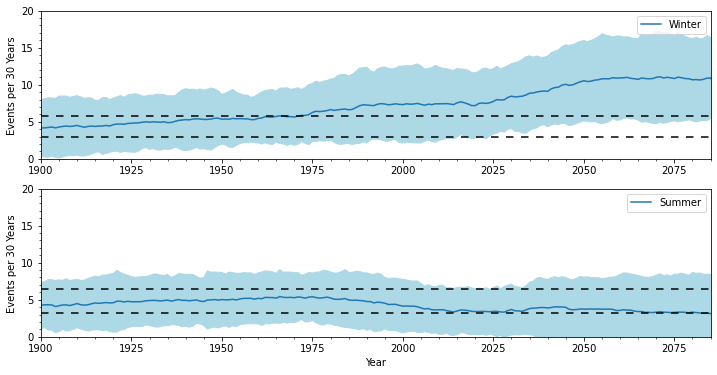

In [68]:
ax=emergePlot(
    compoundCountsXr.sel(fire='pos',experiment='ssp585',drop=True),
    compoundCountsXr.sel(fire='pos',experiment='piControl',drop=True),
    xlim=[1900,2085]
)
plt.xlabel('Year')

ax[0].legend(['Winter'])
ax[1].legend(['Summer'])

ax[0].set_ylim([0,20])
ax[1].set_ylim([0,20])

plt.savefig('results/cmip6AllDryEmergence.pdf')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


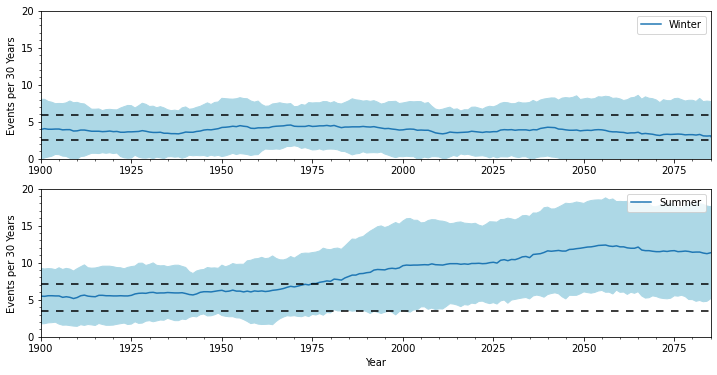

In [69]:
ax=emergePlot(
    compoundCountsXr.sel(fire='neg',experiment='ssp585',drop=True),
    compoundCountsXr.sel(fire='neg',experiment='piControl',drop=True)
)
plt.xlabel('Year')


ax[0].legend(['Winter'])
ax[1].legend(['Summer'])
ax[0].set_xlim([1900,2085])
ax[1].set_xlim([1900,2085])

ax[0].set_ylim([0,20])
ax[1].set_ylim([0,20])

plt.savefig('results/cmip6AllWetEmergence.pdf')

# And by event type

It looks like there is a trend of increasing number of compounds, so lets look at which event pairs are most common

In [18]:
overlapBinFirePos=overlapBins.binSum(
    compoundXr[[
        'ecCombinedDmiSamwinter','ecCombinedDmiSamsummer'
    ]].sel(fire='pos',experiment='ssp585',year=slice(1850,2099), drop=True)
)

In [61]:
overlapBinFireNeg=overlapBins.binSum(
    compoundXr[[
        'ecCombinedDmiSamwinter','ecCombinedDmiSamsummer'
    ]].sel(fire='neg',experiment='ssp585',year=slice(1850,2099), drop=True)
)

In [59]:
%run utils/binPlot.ipynb

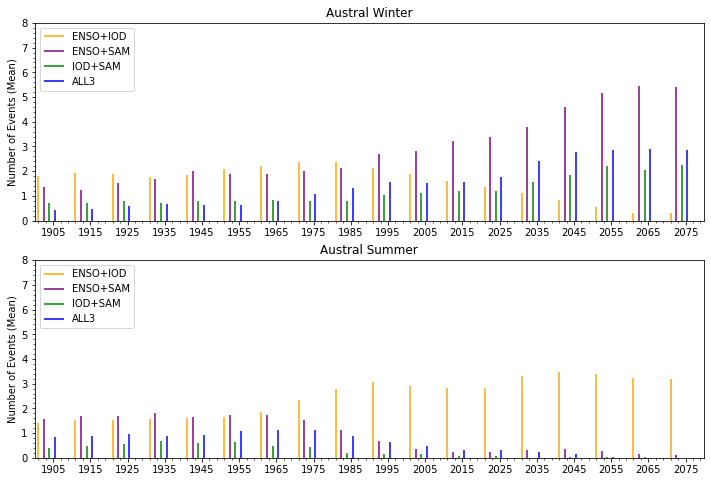

In [115]:
plt.figure(figsize=(12,8))

ax1=plt.subplot(2,1,1)

binPlot(
    overlapBinFirePos['ecCombinedDmiSamwinter'].to_dataset('compound'), 
    ax1
)

plt.xlim([1900,2080])
plt.title('Austral Winter')

ax2=plt.subplot(2,1,2)

binPlot(
    overlapBinFirePos['ecCombinedDmiSamsummer'].to_dataset('compound'), 
    ax2
)

plt.xlim([1900,2080])
plt.title('Austral Summer')


plt.savefig('results/cmip6DryCompoundsByType.pdf')

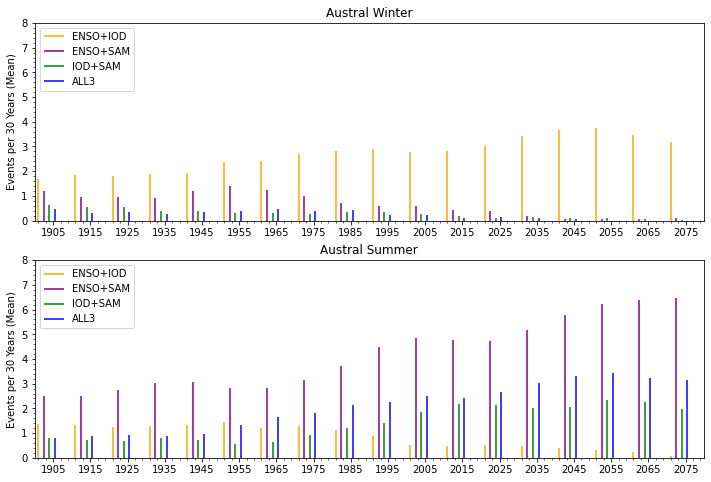

In [114]:
plt.figure(figsize=(12,8))

ax1=plt.subplot(2,1,1)

binPlot(
    overlapBinFireNeg['ecCombinedDmiSamwinter'].to_dataset('compound'), 
    ax1
)

plt.xlim([1900,2080])
plt.title('Austral Winter')
plt.ylabel('Events per 30 Years (Mean)')

ax2=plt.subplot(2,1,2)

binPlot(
    overlapBinFireNeg['ecCombinedDmiSamsummer'].to_dataset('compound'), 
    ax2
)

plt.xlim([1900,2080])
plt.title('Austral Summer')
plt.ylabel('Events per 30 Years (Mean)')


plt.savefig('results/cmip6WetCompoundsByType.pdf')

# Time of emergence - Fire Pos / Dry

In [104]:
%run utils/emergence.ipynb

Using pi control as the background/mean state:

Do a plot to show time of emergence.
Using mean/min/max in each interval as the trend, and number of events (95%CI) in piControl as the baseline

In [86]:
compounds = [
    'all3','enso+iod','enso+sam','iod+sam'
]

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


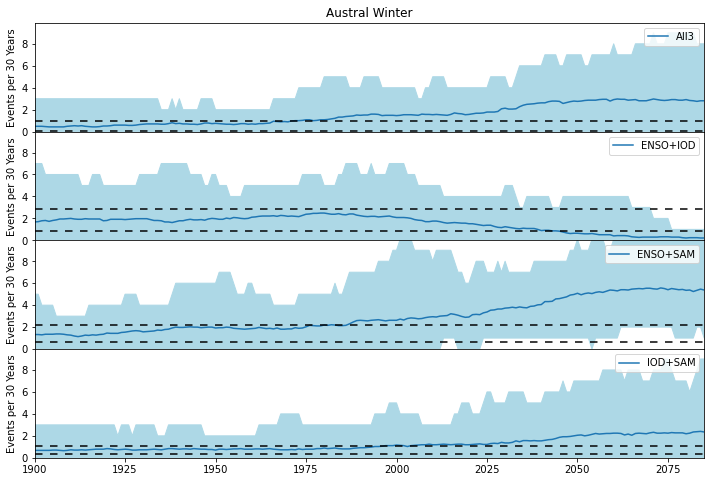

In [112]:
ax=emergePlot(
    firePos.ecCombinedDmiSamwinter.sel(compound=compounds).to_dataset('compound').rolling(year=30,min_periods=15,center=True).sum('year'), 
    piConPos.ecCombinedDmiSamwinter.sel(compound=compounds).to_dataset('compound').rolling(year=30,min_periods=15,center=True).sum('year'),
    xlim=[1900,2085]
)

ax[0].set_title('Austral Winter')
ax[0].legend(['All3'])
ax[1].legend(['ENSO+IOD'])
ax[2].legend(['ENSO+SAM'])
ax[3].legend(['IOD+SAM'])

[axx.set_ylim([0,9.9]) for axx in ax]
[axx.set_xticklabels([]) for axx in ax[:-1]]

plt.subplots_adjust(hspace=0)


plt.savefig('results/cmip6DryWinterCompoundEmergence.pdf')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


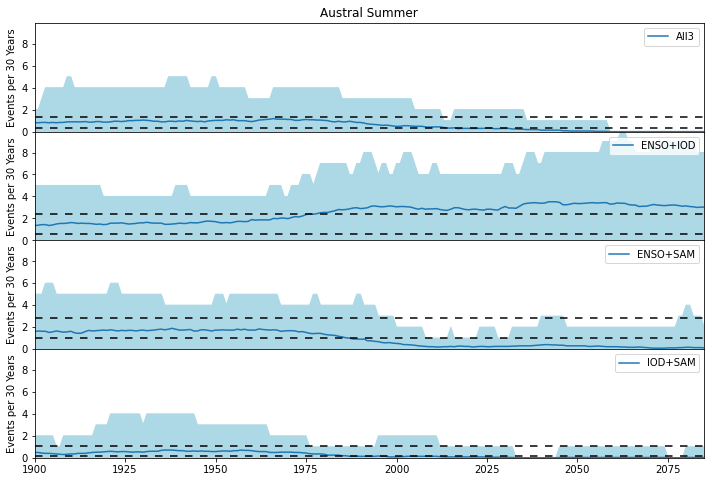

In [113]:
ax=emergePlot(
    firePos.ecCombinedDmiSamsummer.sel(compound=compounds).to_dataset('compound').rolling(year=30,min_periods=15,center=True).sum('year'), 
    piConPos.ecCombinedDmiSamsummer.sel(compound=compounds).to_dataset('compound').rolling(year=30,min_periods=15,center=True).sum('year'),
    xlim=[1900,2085]
)

ax[0].set_title('Austral Summer')
ax[0].legend(['All3'])
ax[1].legend(['ENSO+IOD'])
ax[2].legend(['ENSO+SAM'])
ax[3].legend(['IOD+SAM'])

[axx.set_ylim([0,9.9]) for axx in ax]
[axx.set_xticklabels([]) for axx in ax[:-1]]

plt.subplots_adjust(hspace=0)


plt.savefig('results/cmip6DrySummerCompoundEmergence.pdf')

# Time of Emergence - Fire Neg / Wet

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


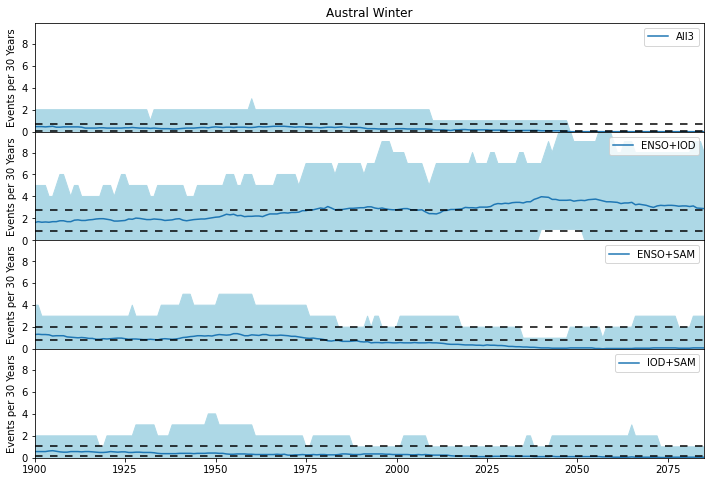

In [116]:
ax=emergePlot(
    fireNeg.ecCombinedDmiSamwinter.sel(compound=compounds).to_dataset('compound').rolling(year=30,min_periods=15,center=True).sum('year'), 
    piConNeg.ecCombinedDmiSamwinter.sel(compound=compounds).to_dataset('compound').rolling(year=30,min_periods=15,center=True).sum('year'),
    xlim=[1900,2085]
)

ax[0].set_title('Austral Winter')
ax[0].legend(['All3'])
ax[1].legend(['ENSO+IOD'])
ax[2].legend(['ENSO+SAM'])
ax[3].legend(['IOD+SAM'])

[axx.set_ylim([0,9.9]) for axx in ax]
[axx.set_xticklabels([]) for axx in ax[:-1]]

plt.subplots_adjust(hspace=0)


plt.savefig('results/cmip6WetWinterCompoundEmergence.pdf')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


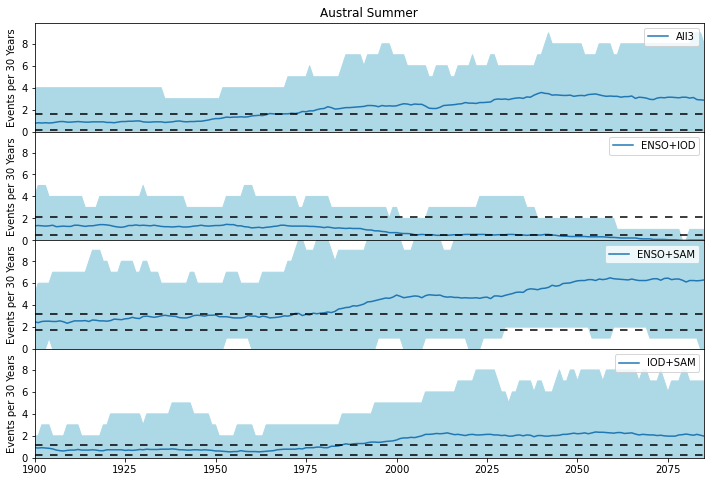

In [117]:
ax=emergePlot(
    fireNeg.ecCombinedDmiSamsummer.sel(compound=compounds).to_dataset('compound').rolling(year=30,min_periods=15,center=True).sum('year'), 
    piConNeg.ecCombinedDmiSamsummer.sel(compound=compounds).to_dataset('compound').rolling(year=30,min_periods=15,center=True).sum('year'),
    xlim=[1900,2085]
)

ax[0].set_title('Austral Summer')
ax[0].legend(['All3'])
ax[1].legend(['ENSO+IOD'])
ax[2].legend(['ENSO+SAM'])
ax[3].legend(['IOD+SAM'])

[axx.set_ylim([0,9.9]) for axx in ax]
[axx.set_xticklabels([]) for axx in ax[:-1]]

plt.subplots_adjust(hspace=0)


plt.savefig('results/cmip6WetSummerCompoundEmergence.pdf')

# Index comparisons - ENSO

enso+iod


(1900.0, 2075.0)

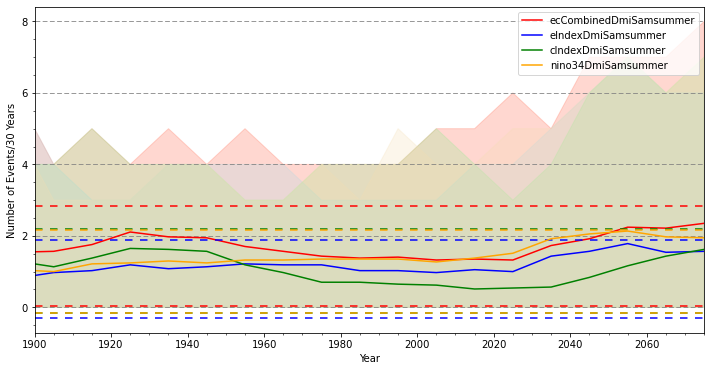

In [26]:
print('enso+iod')
overlaidEmergePlot(
    overlapBinFirePos.to_array().sel(
        compound='enso+iod', 
        variable=['ecCombinedDmiSamsummer', 'eIndexDmiSamsummer','cIndexDmiSamsummer','nino34DmiSamsummer'], 
        drop=True
    ).to_dataset('variable'), 
    piControlBinSumXr.to_array().sel(
        compound='enso+iod', 
        variable=['ecCombinedDmiSamsummer', 'eIndexDmiSamsummer','cIndexDmiSamsummer','nino34DmiSamsummer'], 
        drop=True
    ).to_dataset('variable')
)
#plt.legend(['El Niño+East IO','El Niño+DMI'])
plt.xlim([1900,2075])
#plt.savefig('results/ENSO+dmiandEastIO.png')

enso+iod


(1900.0, 2075.0)

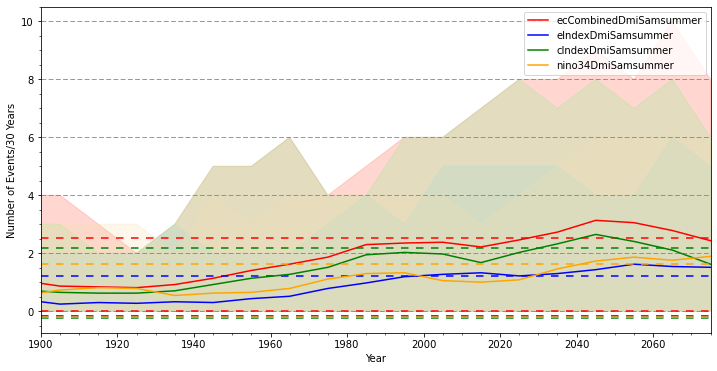

In [27]:
print('enso+iod')
overlaidEmergePlot(
    overlapBinFireNeg.to_array().sel(
        compound='enso+iod', 
        variable=['ecCombinedDmiSamsummer', 'eIndexDmiSamsummer','cIndexDmiSamsummer','nino34DmiSamsummer'], 
        drop=True
    ).to_dataset('variable'), 
    piControlFireNegBinSumXr.to_array().sel(
        compound='enso+iod', 
        variable=['ecCombinedDmiSamsummer', 'eIndexDmiSamsummer','cIndexDmiSamsummer','nino34DmiSamsummer'], 
        drop=True
    ).to_dataset('variable')
)
#plt.legend(['El Niño+East IO','El Niño+DMI'])
plt.xlim([1900,2075])
#plt.savefig('results/ENSO+dmiandEastIO.png')

# Index comparisons - IOD

In [28]:
overlapBinFirePos.to_array().sel(compound='enso+iod', variable=['nino34EastioSamsummer', 'nino34DmiSamsummer']).to_dataset('variable')

<xarray.Dataset>
Dimensions:                (model: 38, year: 22)
Coordinates:
  * model                  (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
    compound               <U8 'enso+iod'
  * year                   (year) int64 1865 1875 1885 1895 ... 2055 2065 2075
Data variables:
    nino34EastioSamsummer  (year, model) float64 3.0 1.0 3.0 1.0 ... 7.0 2.0 0.0
    nino34DmiSamsummer     (year, model) float64 4.0 1.0 2.0 0.0 ... 7.0 3.0 0.0
Attributes:
    indexNames:  ['nino34', 'dmi', 'samSummer']
    indeces:     ['enso', 'iod', 'sam']
    pairs:       ['enso+iod', 'enso+sam', 'iod+sam']
    others:      ['all3', 'anyCompound', 'nEvents']
    Bins:        Overlapping 30 year bins, seperating by 10 year intervals
    Year:        Midpoint of bin

In [ ]:
piControlBinSumXr.to_array().sel(compound='enso+iod', variable=['nino34EastioSamsummer', 'nino34DmiSamsummer'], drop=True).to_dataset('variable')

In [ ]:
print('enso+iod')
overlaidEmergePlot(
    overlapBinFirePos.to_array().sel(
        compound='enso+iod', 
        variable=['ecCombinedEastioSamsummer', 'ecCombinedDmiSamsummer'], 
        drop=True
    ).to_dataset('variable'), 
    piControlBinSumXr.to_array().sel(
        compound='enso+iod', 
        variable=['ecCombinedEastioSamsummer', 'ecCombinedDmiSamsummer'], 
        drop=True
    ).to_dataset('variable')
)
plt.legend(['El Niño+East IO','El Niño+DMI'])
plt.xlim([1900,2075])
#plt.savefig('results/ENSO+dmiandEastIO.png')

In [ ]:
print('iod without Enso')
overlaidEmergePlot(
    overlapBinFirePos.to_array().sel(compound='iod', variable=['ecCombinedEastioSamsummer', 'ecCombinedDmiSamsummer'], drop=True).to_dataset('variable'), 
    piControlBinSumXr.to_array().sel(compound='iod', variable=['ecCombinedEastioSamsummer', 'ecCombinedDmiSamsummer'], drop=True).to_dataset('variable')
)



In [ ]:
print('enso+iod')
overlaidEmergePlot(
    overlapBinFireNeg.to_array().sel(compound='enso+iod', variable=['ecCombinedEastioSamsummer', 'ecCombinedDmiSamsummer'], drop=True).to_dataset('variable'), 
    piControlFireNegBinSumXr.to_array().sel(compound='enso+iod', variable=['ecCombinedEastioSamsummer', 'ecCombinedDmiSamsummer'], drop=True).to_dataset('variable')
)



In [ ]:
print('iod without Enso')
overlaidEmergePlot(
    overlapBinFireNeg.to_array().sel(compound='iod', variable=['ecCombinedEastioSamsummer', 'ecCombinedDmiSamsummer'], drop=True).to_dataset('variable'), 
    piControlFireNegBinSumXr.to_array().sel(compound='iod', variable=['ecCombinedEastioSamsummer', 'ecCombinedDmiSamsummer'], drop=True).to_dataset('variable')
)

